In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.709257,0.796894,4.045638e-09,0.695026,0.708712,-0.010530,0.708212,0.604723,-0.011138,0.720372,...,0.836324,0.632933,-0.002609,0.842043,0.595624,-0.007006,0.840401,0.563857,-0.010162,cup
1,0.670831,0.801059,1.771594e-08,0.654878,0.714073,-0.013856,0.663105,0.610655,-0.017982,0.670667,...,0.796614,0.634502,-0.015055,0.796340,0.589819,-0.023807,0.784981,0.559667,-0.028559,cup
2,0.460377,0.737617,-1.976423e-07,0.436286,0.650736,-0.008606,0.424170,0.543885,-0.016568,0.407028,...,0.551137,0.508760,-0.044756,0.525161,0.477502,-0.049408,0.501836,0.471821,-0.050235,cup
3,0.537167,0.729106,-1.574361e-07,0.515234,0.644450,-0.013976,0.510085,0.534136,-0.022870,0.502558,...,0.643771,0.512584,-0.035355,0.630021,0.478614,-0.040662,0.611160,0.472381,-0.042369,cup
4,0.709816,0.775457,1.835854e-08,0.698263,0.688781,-0.004351,0.717851,0.588477,-0.002883,0.734736,...,0.838839,0.615200,-0.013617,0.850109,0.575805,-0.017027,0.855873,0.541677,-0.019232,cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,bottle
395,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,bottle
396,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,bottle
397,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,bottle


In [11]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.418706,0.275689,-1.041261e-06,0.403358,0.410959,-0.037550,0.332084,0.554424,-0.054716,0.287586,...,0.215414,0.204074,-0.067023,0.269033,0.227855,-0.056067,0.284946,0.232365,-0.041604,no
1,0.438033,0.319166,-1.022041e-06,0.409327,0.466623,-0.027032,0.326391,0.607555,-0.034964,0.274559,...,0.191345,0.254441,-0.048722,0.250584,0.268456,-0.031128,0.280644,0.268804,-0.009968,no
2,0.763721,0.284512,-8.703249e-07,0.735152,0.406009,-0.039417,0.661131,0.530512,-0.058173,0.616764,...,0.590237,0.166806,-0.057472,0.634541,0.201350,-0.047953,0.650215,0.209207,-0.034125,no
3,0.616285,0.315325,-1.012475e-06,0.585081,0.454520,-0.038505,0.497049,0.590924,-0.056238,0.447701,...,0.392529,0.219463,-0.069711,0.449134,0.248308,-0.052299,0.462978,0.244593,-0.033017,no
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,no
5,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,no
6,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,no
7,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,no
8,0.577187,0.309330,-1.062364e-06,0.544401,0.456769,-0.031919,0.464284,0.605844,-0.047333,0.419428,...,0.347692,0.231892,-0.074445,0.404598,0.257698,-0.056921,0.429138,0.258681,-0.036464,no
9,0.633539,0.307427,-9.557959e-07,0.600190,0.449049,-0.039941,0.516008,0.583674,-0.058712,0.466800,...,0.414978,0.222962,-0.060570,0.471503,0.247736,-0.042150,0.484481,0.240541,-0.021534,no


In [12]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (499, 63)
Labels shape = (499,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
y_pred = svm.predict(x_test)
y_pred

array(['no', 'yes', 'yes', '5', '5', 'no', '4', '5', 'thanks', 'thanks',
       'yes', 'yes', '5', 'yes', 'thanks', '4', '5', '4', 'thanks', 'no',
       'yes', '4', 'yes', 'thanks', 'no', '5', 'thanks', '4', 'no', 'yes',
       '4', 'thanks', 'thanks', 'thanks', '4', '5', '4', '5', '4', 'yes',
       '4', 'no', '5', 'yes', 'no', 'no', 'yes', '4', '5', 'thanks', '4',
       'thanks', '4', 'thanks', 'thanks', 'thanks', '4', 'thanks', 'yes',
       '4', 'thanks', 'yes', '4', '5', '4', 'thanks', 'thanks', '5',
       'yes', 'no', 'thanks', 'no', '4', '4', 'thanks', '4', 'yes',
       'thanks', '5', 'yes', '4', 'yes', '4', 'yes', '4', '4', '5',
       'thanks', '4', 'thanks', 'yes', '5', '4', 'yes', 'thanks', '4',
       'no', '5', 'thanks', 'yes'], dtype=object)

In [15]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.94, 0.94, 0.94)

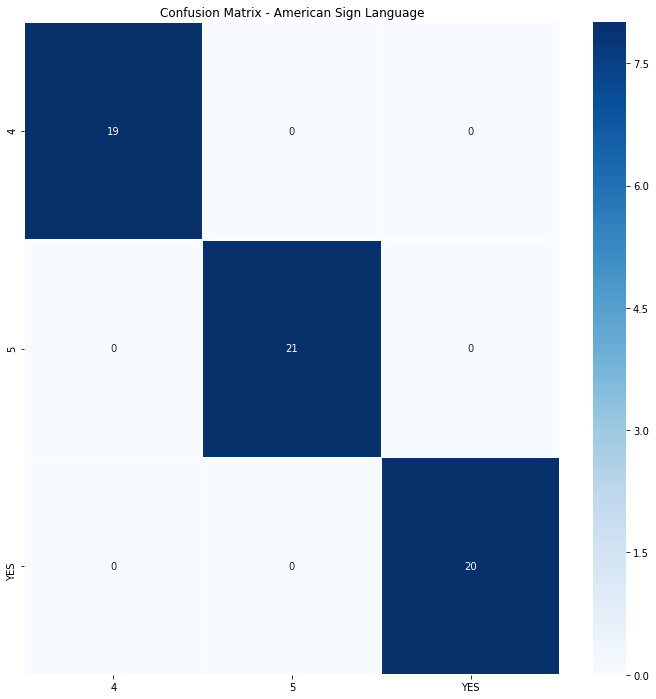

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)